In [74]:
import matplotlib.pyplot as plt
import librosa
import IPython.display 
import numpy as np
from pydub import AudioSegment
import plotly
import plotly.graph_objs as go 
import librosa.display
from scipy.io import wavfile


In [113]:
FULL_WAV_PATH = 'Nattapol_Full.m4a'
DATASET_FOLDER_PATH = "Thitima_Dataset4"

32000


In [114]:
# Read using pydub
audiofile = AudioSegment.from_file(FULL_WAV_PATH)
signal = np.array(audiofile.get_array_of_samples())
fs = audiofile.frame_rate
filename = "wav_file"
wavfile.write(filename, fs, signal)
wav, sr = librosa.load(filename,sr=fs)
IPython.display.Audio(filename)
signal = wav
# IPython.display.display(IPython.display.Audio("Nattapol1.wav"))

In [104]:
print(np.shape(signal))
print(np.shape(wav))
print(fs)
print(sr)
print(type(signal))
print(type(wav))
print(signal[1])
print(wav[1]) # librosa library return float array


(9678848,)
(9678848,)
16000
16000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
-6.1035156e-05
-6.1035156e-05


In [106]:
# Fixed-sized segmentation (break a signal into non-overlapping segments)
signal_len = len(signal)
segment_size_t = 1 # segment size in seconds
segment_size = int(segment_size_t * fs)  # segment size in samples
# Break signal into list of segments in a single-line Python code
segments = np.array([signal[x:x + segment_size] for x in
                     np.arange(0, signal_len, segment_size)],dtype=object)
print(np.shape(segments[1]))

(16000,)


[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


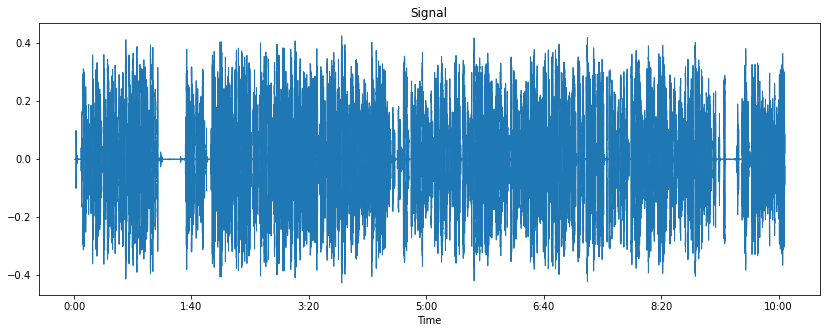

In [111]:
plt.figure(figsize=(14, 5))
plt.title('Signal')
librosa.display.waveshow(signal, sr=fs)

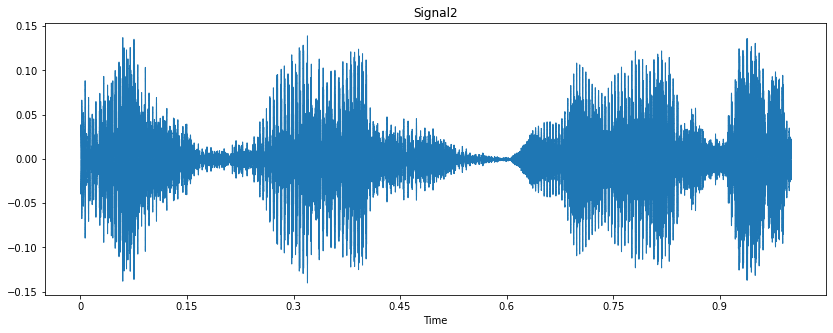

In [108]:
plt.figure(figsize=(14, 5))
plt.title('Signal2')
segment_1 = np.array(segments[10]).astype(float)
librosa.display.waveshow(segment_1, sr=fs)

In [109]:
# Remove pauses using an energy threshold = 50% of the median energy:
energies = [(s**2).sum() / len(s) for s in segments]
# print(energies)
thres = 0.5 * np.median(energies)
print(thres)
index_of_segments_to_keep = (np.where(energies > thres)[0])
print(index_of_segments_to_keep)
print(np.shape(index_of_segments_to_keep))
segments = segments[index_of_segments_to_keep]

0.001049447536468506
[  7   8   9  10  15  18  19  20  21  24  25  26  27  28  29  31  32  33
  34  35  37  38  39  40  41  43  44  46  47  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  64  65  66  67  68  95  97  98  99 100 101
 103 104 106 107 108 109 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 136 137 138 139 140 141 142 143 144 145 146 148
 149 152 153 154 157 158 159 161 162 163 164 165 166 167 170 172 173 174
 175 177 178 179 180 181 182 183 184 185 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 209 210 211 212 215 216
 217 218 219 220 221 222 224 225 227 228 230 231 232 235 236 237 239 240
 241 242 244 245 246 247 248 249 250 251 253 254 255 256 257 258 259 260
 261 263 264 265 266 271 275 276 280 281 282 283 286 287 289 290 291 292
 294 296 297 299 300 301 303 304 306 307 308 309 310 312 313 315 316 317
 319 320 323 324 325 326 327 330 331 332 334 335 338 339 340 341 342 343
 344 345 346 347 349 350 351 3

In [110]:
import shutil
from os import makedirs
from os.path import exists,join

def make_clean_folder(path_folder):
    if not exists(path_folder):
        makedirs(path_folder)
    else:
        shutil.rmtree(path_folder)
        makedirs(path_folder)

make_clean_folder(DATASET_FOLDER_PATH)
for count,segment in enumerate(segments):
    filename = join(DATASET_FOLDER_PATH, str(count) + ".wav")
    wavfile.write(filename, fs, np.array(segment).astype(float))